In [1]:
import tensorflow as tf
from tensorflow.keras import layers
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras import datasets, layers, models
from tensorflow.keras.utils import to_categorical
import seaborn as sns
sns.set(style="white", color_codes=True)

In [2]:
from google.colab import files
uploaded = files.upload()

Saving nilai_mapel.csv to nilai_mapel.csv


In [3]:
import io
df = pd.read_csv(io.BytesIO(uploaded['nilai_mapel.csv']))
df.head()
# Dataset is now stored in a Pandas Dataframe

,Matematika,Bahasa Indonesia,IPA,IPS,Bahasa Inggris,Penjaskes,Seni Budaya,OUTPUT
0,77,65,82,93,74,70,70,Interpersonal
1,89,77,90,82,85,70,77,Logika
2,83,90,80,64,92,80,70,Verbal
3,84,96,85,67,97,80,80,Verbal
4,75,92,80,72,91,80,82,Verbal


In [4]:
x = df.iloc[:,0:7].values
y = df.iloc[:,7].values

print(x[0:5])
print(y[0:5])

[[77 65 82 93 74 70 70]
 [89 77 90 82 85 70 77]
 [83 90 80 64 92 80 70]
 [84 96 85 67 97 80 80]
 [75 92 80 72 91 80 82]]
['Interpersonal' 'Logika' 'Verbal' 'Verbal' 'Verbal']


In [5]:
print(x.shape)
print(y.shape)
     

(100, 7)
(100,)


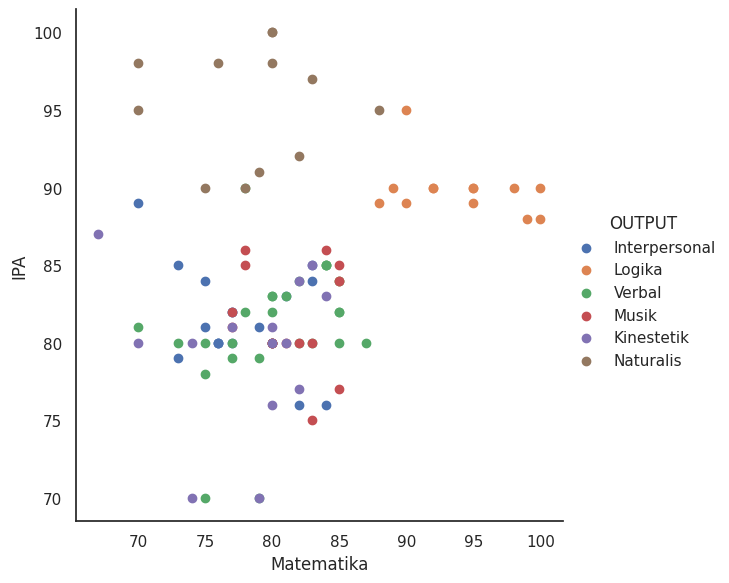

In [6]:
sns.FacetGrid(df, hue="OUTPUT", height=6).map(plt.scatter,"Matematika", "IPA").add_legend()

In [7]:
from sklearn.preprocessing import LabelEncoder
encoder =  LabelEncoder()
y1 = encoder.fit_transform(y)
     

In [8]:
print(y1)

[0 2 5 5 5 3 0 1 2 4 1 5 0 2 2 5 4 5 1 0 5 0 3 3 2 0 0 1 1 3 3 2 3 5 2 2 1
 5 2 5 4 0 1 4 0 3 5 3 1 4 5 3 4 5 3 4 0 1 2 4 1 5 5 5 1 0 5 4 3 5 0 1 0 5
 5 0 3 5 2 0 2 0 5 4 3 1 2 0 3 0 5 5 5 1 2 5 4 4 3 5]


In [9]:
y = pd.get_dummies(y1).values
print(y[0:5])

[[1 0 0 0 0 0]
 [0 0 1 0 0 0]
 [0 0 0 0 0 1]
 [0 0 0 0 0 1]
 [0 0 0 0 0 1]]


In [10]:
from sklearn.model_selection import train_test_split

In [11]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)
print(x_train[0:5])

[[75 60 90 83 73 85 88]
 [80 99 80 62 89 80 75]
 [84 96 85 67 97 80 80]
 [82 78 84 79 70 95 80]
 [80 77 80 63 70 80 90]]


In [12]:
print(y_train[0:5])

[[0 0 0 0 1 0]
 [0 0 0 0 0 1]
 [0 0 0 0 0 1]
 [0 1 0 0 0 0]
 [0 0 0 1 0 0]]


In [13]:
print(x_test[0:5])
print(y_test[0:5])

[[ 70  72  89  94  69  60  77]
 [100  86  90  94  73  85  84]
 [ 83  90  80  64  92  80  70]
 [ 88  72  95  70  62  80  80]
 [ 75  76  84  97  88  65  66]]
[[1 0 0 0 0 0]
 [0 0 1 0 0 0]
 [0 0 0 0 0 1]
 [0 0 0 0 1 0]
 [1 0 0 0 0 0]]


In [14]:
x_test

array([[ 70,  72,  89,  94,  69,  60,  77],
       [100,  86,  90,  94,  73,  85,  84],
       [ 83,  90,  80,  64,  92,  80,  70],
       [ 88,  72,  95,  70,  62,  80,  80],
       [ 75,  76,  84,  97,  88,  65,  66],
       [ 83,  73,  85,  65,  70,  99,  80],
       [ 80,  68, 100,  84,  85,  70,  85],
       [ 85,  97,  84,  71,  89,  80,  77],
       [ 83,  60,  80,  70,  80,  80,  95],
       [ 78,  75,  90,  79,  91,  80,  77],
       [ 81,  96,  83,  80,  97,  70,  80],
       [ 84,  95,  85,  84, 100,  75,  85],
       [ 95,  66,  89,  75,  72,  80,  85],
       [ 92,  80,  90,  85,  76,  65,  77],
       [ 67,  74,  87,  75,  50,  90,  65],
       [ 81,  72,  80,  75,  60,  79,  93],
       [ 80,  78,  80,  84,  82,  70,  95],
       [ 92,  65,  90,  73,  70,  80,  68],
       [ 77,  94,  80,  70,  94,  70,  75],
       [ 88,  70,  89,  79,  62,  80,  67]])

In [26]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(6, activation='softmax')
  ])
model

In [55]:
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [56]:
model.fit(x_train, y_train, batch_size=64, epochs=1000)


Epoch 1/1000
2/2 [==============================] - 1s 7ms/step - loss: 0.9756 - accuracy: 0.6000
Epoch 2/1000
2/2 [==============================] - 0s 7ms/step - loss: 0.7661 - accuracy: 0.7125
Epoch 3/1000
2/2 [==============================] - 0s 6ms/step - loss: 0.7822 - accuracy: 0.6625
Epoch 4/1000
2/2 [==============================] - 0s 9ms/step - loss: 0.7616 - accuracy: 0.7125
Epoch 5/1000
2/2 [==============================] - 0s 7ms/step - loss: 0.7890 - accuracy: 0.6625
Epoch 6/1000
2/2 [==============================] - 0s 6ms/step - loss: 0.8405 - accuracy: 0.6375
Epoch 7/1000
2/2 [==============================] - 0s 5ms/step - loss: 0.7622 - accuracy: 0.7125
Epoch 8/1000
2/2 [==============================] - 0s 5ms/step - loss: 0.7637 - accuracy: 0.7125
Epoch 9/1000
2/2 [==============================] - 0s 5ms/step - loss: 0.7654 - accuracy: 0.7000
Epoch 10/1000
2/2 [==============================] - 0s 8ms/step - loss: 0.8277 - accuracy: 0.6750
Epoch 11/1000
2/2 [

In [57]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 10)                80        
                                                                 
 dense_7 (Dense)             (None, 10)                110       
                                                                 
 dense_8 (Dense)             (None, 6)                 66        
                                                                 
Total params: 256
Trainable params: 256
Non-trainable params: 0
_________________________________________________________________


In [58]:
loss, accuracy = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', loss)
print('Test accuracy:', accuracy)

Test loss: 1.0314586162567139
Test accuracy: 0.6499999761581421


In [59]:
y_pred = model.predict(x_test)
y_pred

1/1 [==============================] - 0s 57ms/step


array([[8.98232520e-01, 4.86635923e-04, 6.59987843e-03, 5.98921266e-04,
        9.40819234e-02, 1.68175662e-18],
       [3.71036120e-02, 5.46375632e-05, 6.76469266e-01, 2.74837971e-01,
        1.15344767e-02, 8.00347982e-12],
       [3.54506285e-03, 7.37279281e-02, 1.48051688e-02, 3.82598974e-02,
        3.11804172e-02, 8.38481605e-01],
       [3.46326739e-01, 1.01992302e-02, 2.74945080e-01, 1.28804758e-01,
        2.39724219e-01, 2.33274977e-09],
       [4.92611527e-01, 6.27947152e-02, 1.36008365e-02, 5.06571215e-03,
        4.25927162e-01, 4.94073449e-10],
       [1.34466263e-02, 8.49381804e-01, 6.59462414e-04, 1.04957737e-03,
        1.17434531e-01, 1.80278625e-02],
       [7.09562898e-01, 3.61363683e-03, 6.18083104e-02, 1.37325460e-02,
        2.11282581e-01, 2.24716133e-13],
       [3.54506285e-03, 7.37279281e-02, 1.48051688e-02, 3.82598974e-02,
        3.11804172e-02, 8.38481605e-01],
       [6.07092911e-03, 3.25182482e-05, 5.80193877e-01, 4.10181850e-01,
        3.52081261e-03, 

In [60]:
actual = np.argmax(y_test,axis=1)
predicted = np.argmax(y_pred,axis=1)
print(f"Actual: {actual}")
print(f"Predicted: {predicted}")

Actual: [0 2 5 4 0 1 4 5 3 5 5 5 2 2 1 3 3 2 5 2]
Predicted: [0 2 5 0 0 1 0 5 2 1 5 5 2 2 1 2 2 2 5 0]
